In [23]:
# ignore this setup line
%matplotlib inline

# Basic matplotlib visualization of climate data


Let's try to recreate the chart in this Economist infographic-editorial, [The hottest year on record: 2015](http://www.economist.com/blogs/graphicdetail/2016/01/climate-change).


If you've cloned this repo ([https://github.com/datademofun/matplotlibsampler](https://github.com/datademofun/matplotlibsampler)), my copy of the data file is in [data/climate/nasa-gistemp-annual-mean.csv](data/climate/nasa-gistemp-annual-mean.csv). It comes from NASA -- and you can read the details of its collection in this notebook:

[https://github.com/dannguyen/python-notebooks-data-wrangling/blob/master/Data-Extraction--NASA-Text.ipynb](https://github.com/dannguyen/python-notebooks-data-wrangling/blob/master/Data-Extraction--NASA-Text.ipynb)


The data file contains average global temperature measurements since 1880. More specifically, the values in the `annual_mean` column represent the _difference_ of a particular year's global average temp _compared to the average global temp measured from 1951 to 1980_.

In other words, a value of `-0.39` degrees for the year `1883` means that 1883's estimated global average was 0.39 celsius below the average global temp for the 1951-to-1980 period. 

The Economist's visual interpretation seems to show a warming trend:

![economist image](http://cdn.static-economist.com/sites/default/files/imagecache/original-size/images/2016/01/blogs/graphic-detail/20160123_woc185_0.png)



In [24]:
from os.path import join
import csv
datafname = join('data', 'climate', 'nasa-gistemp-annual-mean.csv')
with open(datafname, 'r') as rf:
    datarows = list(csv.DictReader(rf))    

Or, if you haven't cloned this repo, you can fetch the data via requests:

```py
import requests
import csv
url = 'https://raw.githubusercontent.com/datademofun/matplotlibsampler/master/data/climate/nasa-gistemp-annual-mean.csv'
resp = requests.get(url)
datarows = csv.DictReader(resp.text.splitlines())
```

If you are doing this in iPython and want to see the charts rendered interactively, remember to include this magic command:

```py
%matplotlib
```

And then, whether you're in ipython or doing a standalone script, import matplotlib:


In [25]:
import matplotlib.pyplot as plt

In [26]:
# take a look at the data
print(datarows[0])

{'annual_mean': '-0.49', 'year': '1880'}


Let's make a quick bar chart. We want `year` for the x-values and `annual_mean` for the y-values. Basically, we need to create two new lists from our `datarows` list-of-dicts:

In [27]:
xvals = []
yvals = []

for d in datarows:
    xvals.append(d['year'])
    yvals.append(d['annual_mean'])


## Get used to list comprehensions

From here on out, I'm just going to assume you know how to do a list comprehension, which are equivalent to the for-loop construct above, but more elegant (if hard to understand at first). If you don't quite get it, it's just something that takes practice.

Here's a nice guide: [Python List Comprehensions: Explained Visually](http://treyhunner.com/2015/12/python-list-comprehensions-now-in-color/)

And here's the previous snippet in list-comprehension form:

In [28]:
xvals = [d['year'] for d in datarows]
yvals = [d['annual_mean'] for d in datarows]

OK, let's make our first chart:

```py
fig, ax = plt.subplots()
ax.bar(xvals, yvals)
```

Ooops, it's going to result in an error:

```
/Users/dtown/.pyenv/versions/anaconda3-2.5.0/lib/python3.5/site-packages/matplotlib/axes/_axes.py in bar(self, left, height, width, bottom, **kwargs)
   2116         args = zip(left, bottom, width, height, color, edgecolor, linewidth)
   2117         for l, b, w, h, c, e, lw in args:
-> 2118             if h < 0:
   2119                 b += h
   2120                 h = abs(h)

TypeError: unorderable types: str() < int()
```

Basically, it doesn't like how `xvals` and `yvals` are __not numbers__ -- remember that deserializing CSV files just imports a bunch of string text values.

So let's typecast them in our list comprehensions:

In [29]:
years = [int(d['year']) for d in datarows]
means = [float(d['annual_mean']) for d in datarows]


And now we should be able to chart:

<Container object of 136 artists>

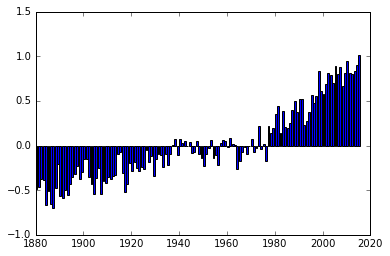

In [30]:
fig, ax = plt.subplots()
ax.bar(years, means)

# Creating a conditionally-colored chart

OK, it was easy enough to chart the data. But how do we create the effect of the [Economist's chart](http://www.economist.com/blogs/graphicdetail/2016/01/climate-change), which helpfully colored hot years in orange and cold years in blue?

The concept is pretty simple: for entries in `datarows` in which the `annual_mean` value is _positive_, collect the year/mean-temp pairs in a list named `hots`. Do the same for sub-zero values in a list name `colds`.

However, this is just more than a bit tedious thanks to how reading from CSV files doesn't typecast the values (and our work above did not actually mutate the `datarows` object). So here's one approach to creating `hots` and `colds`:

In [31]:
colds = []
hots = []
for d in datarows:
    yr = int(d['year'])
    mean = float(d['annual_mean'])
    if mean < 0:
        colds.append((yr, mean))
    else:
        hots.append((yr, mean))


Tedious, right? Keep the tedium of that process in mind because that's why we'll soon be learning [pandas](http://pandas.pydata.org/).

For now, we can create the red/blue - hot/cold graph...see if your list-comprehenshion-foo is good enough to understand what's happening below:

<Container object of 57 artists>

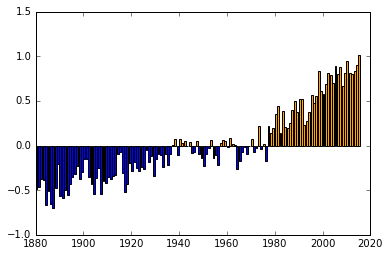

In [32]:
fig, ax = plt.subplots()
ax.bar([x[0] for x in colds], [x[1] for x in colds], color='blue')                
ax.bar([x[0] for x in hots], [x[1] for x in hots], color='orange')                                